In [1]:
import re
import pickle
import string
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import scipy
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YongLe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Only for submission to Kaggle to see scores
# df = pd.read_csv('test.csv')
# df = df[['id', 'text']]
# STOPWORDS = set(nltk.corpus.stopwords.words('english'))
# df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
# df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
# df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
# df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# df['char_count'] = df['text'].apply(lambda x: len(str(x)))
# df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
# df['url_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
# df['hashtag_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
# df['mention_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# # Do a brief cleaning of the data
# df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
# df['text'] = [x.lower() for x in df['text']] # lowercase 

# # Combine correlated features
# df['word_unique_ratio'] = df['unique_word_count'] / df['word_count']
# df.drop(['word_count', 'unique_word_count'], axis=1, inplace=True)

# # Load the model stacking_model.sav
# model = pickle.load(open('stacking_model_2.sav', 'rb'))

# # Make predictions
# predictions = model.predict(df)

# # Save the predictions to a csv file
# df = pd.DataFrame({'id': df['id'], 'target': predictions})
# df.to_csv('submission_2.csv', index=False) # Retrained model is 0.1 weaker than the first one

In [3]:
# Load the data from tweets.json
df = pd.read_json('tweets.json', lines=True)

# Print the first 5 rows of data
df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,cashtags,card,viewCount,vibe,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/JtrOmar/status/1623107677483159552,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j,No tientes! https://t.co/UD3YSYis3j,1623107677483159552,"{'_type': 'snscrape.modules.twitter.User', 'username': 'JtrOmar', 'id': 1405202831179665414, 'displayname': 'OJTorresR', 'rawDescription': 'Piensa en grande y no escuches a quienes te dicen que no lo puedes lograr.', 'renderedDescription': 'Piensa en grande y no escuches a quienes te dicen que no lo puedes lograr.', 'descriptionLinks': None, 'verified': False, 'created': '2021-06-16T16:38:17+00:00', 'followersCount': 3, 'friendsCount': 100, 'statusesCount': 505, 'favouritesCount': 1213, 'listedCount': 0, 'mediaCount': 45, 'location': '', 'protected': False, 'link': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1634102344001437698/pLugA-8J_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1405202831179665414/1675861204', 'label': None, 'description': 'Piensa en grande y no escuches a quienes te dicen que no lo puedes lograr.', 'descriptionUrls': None, 'linkTcourl': None, 'linkUrl': None, 'url': 'https://twitter.com/JtrOmar'}",0,0,0,...,NaN,None,7.0,NaN,No tientes! https://t.co/UD3YSYis3j,[],,[],,JtrOmar
1,snscrape.modules.twitter.Tweet,https://twitter.com/LastQuake/status/1623103555031769089,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will be displayed here. Find more at:\n📱https://t.co/LBaVNedgF9\n🌐https://t.co/z6tAk3SACz\n🖥https://t.co/Xt8nBGUst4,‼ No further info about this #earthquake will be displayed here. Find more at:\n📱emsc-csem.org/service/applic…\n🌐m.emsc.eu/?id=1219922\n🖥emsc-csem.org/Earthquake/ear…,1623103555031769089,"{'_type': 'snscrape.modules.twitter.User', 'username': 'LastQuake', 'id': 203226820, 'displayname': 'EMSC', 'rawDescription': 'Independent Scientific Organization and provider of real-time earthquake info. https://t.co/7sdOzjx9qG Get the app : https://t.co/0ukLd2OdIw…', 'renderedDescription': 'Independent Scientific Organization and provider of real-time earthquake info. masto.ai/@LastQuake Get the app : emsc-csem.org/service/applic…', 'descriptionLinks': [{'_type': 'snscrape.modules.twitter.TextLink', 'text': 'masto.ai/@LastQuake', 'url': 'https://masto.ai/@LastQuake', 'tcourl': 'https://t.co/7sdOzjx9qG', 'indices': [80, 103]}, {'_type': 'snscrape.modules.twitter.TextLink', 'text': 'emsc-csem.org/service/applic', 'url': 'http://emsc-csem.org/service/applic', 'tcourl': 'https://t.co/0ukLd2OdIw', 'indices': [120, 143]}], 'verified': True, 'created': '2010-10-15T20:25:28+00:00', 'followersCount': 300026, 'friendsCount': 515, 'statusesCount': 148421, 'favouritesCount': 8504, 'listedCount': 2316, 'mediaCount': 87728, 'location': 'based in Paris, works globally', 'protected': False, 'link': {'_type': 'snscrape.modules.twitter.TextLink', 'text': 'emsc-csem.org', 'url': 'http://www.emsc-csem.org', 'tcourl': 'https://t.co/Gqo1PffnsH', 'indices': [0, 23]}, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/669532787897147392/hQM844QV_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/203226820/1629710597', 'label': None, 'description': 'Independent Scientific Organization and provider of real-time earthquake info. masto.ai/@LastQuake Get the app : emsc-csem.org/service/applic…', 'descriptionUrls': [{'_type': 'snscrape.modules.twitter.TextLink', 'text': 'masto.ai/@LastQuake', 'url': 'https://masto.ai/@LastQuake', 'tcourl': 'https://t.co/7sdOzjx9qG', 'indices': [80, 103]}, {'_type': 'snscrape.modules.twitter.TextLink', 'text': 'emsc-csem.org/service/applic', 'url': 'http://emsc-csem.org/service/applic', 'tcourl': 'https://t.co/0ukLd2OdIw', 'indices': [120, 143]}], 'linkTcourl': 'https://t.co/Gqo1PffnsH', 'linkUrl': 'http://www.emsc-csem.org',

In [4]:
# Keep only date and renderedContent columns
df = df[['date', 'renderedContent']]
df.columns = ['date', 'text']
df.head()

,date,text
0,2023-02-07 23:53:20+00:00,No tientes! https://t.co/UD3YSYis3j
1,2023-02-07 23:36:57+00:00,‼ No further info about this #earthquake will be displayed here. Find more at:\n📱emsc-csem.org/service/applic…\n🌐m.emsc.eu/?id=1219922\n🖥emsc-csem.org/Earthquake/ear…
2,2023-02-07 23:28:26+00:00,@luz_marcha Good night 🙏❤️
3,2023-02-07 23:28:05+00:00,@ChrisHowley6 Clever girl 😂
4,2023-02-07 23:26:57+00:00,"@FlirtyFlightB2 Beautiful,,😘"


In [5]:
# Create meta features from text
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df['stop_word_count'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['mean_word_length'] = df['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Do a brief cleaning of the data
df['text'] = [re.sub('\s+', ' ', x) for x in df['text']] # This removes all extra spaces
df['text'] = [x.lower() for x in df['text']] # lowercase 

# Combine correlated features
df['word_unique_ratio'] = df['unique_word_count'] / df['word_count']
df.drop(['word_count', 'unique_word_count'], axis=1, inplace=True)

df.head()


,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,1,11.000000,35,6,1.0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will be displayed here. find more at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219922 🖥emsc-csem.org/earthquake/ear…,7,8.647059,163,16,1.0
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,0,5.750000,26,2,1.0
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,0,6.000000,27,1,1.0
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",0,13.500000,28,3,1.0


In [6]:
# Load the model stacking_model.sav
model = pickle.load(open('stacking_model.sav', 'rb'))

In [7]:
# Define X
features = df.drop('date', axis=1).columns
X = df[features]

# Predict positive or negative label
y_pred = model.predict(X)

# Add the prediction to the dataframe
df['prediction'] = y_pred

# Print the first 5 rows of the dataframe
df.head()

,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio,prediction
0,2023-02-07 23:53:20+00:00,no tientes! https://t.co/ud3ysyis3j,1,11.000000,35,6,1.0,0
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will be displayed here. find more at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219922 🖥emsc-csem.org/earthquake/ear…,7,8.647059,163,16,1.0,1
2,2023-02-07 23:28:26+00:00,@luz_marcha good night 🙏❤️,0,5.750000,26,2,1.0,0
3,2023-02-07 23:28:05+00:00,@chrishowley6 clever girl 😂,0,6.000000,27,1,1.0,0
4,2023-02-07 23:26:57+00:00,"@flirtyflightb2 beautiful,,😘",0,13.500000,28,3,1.0,0


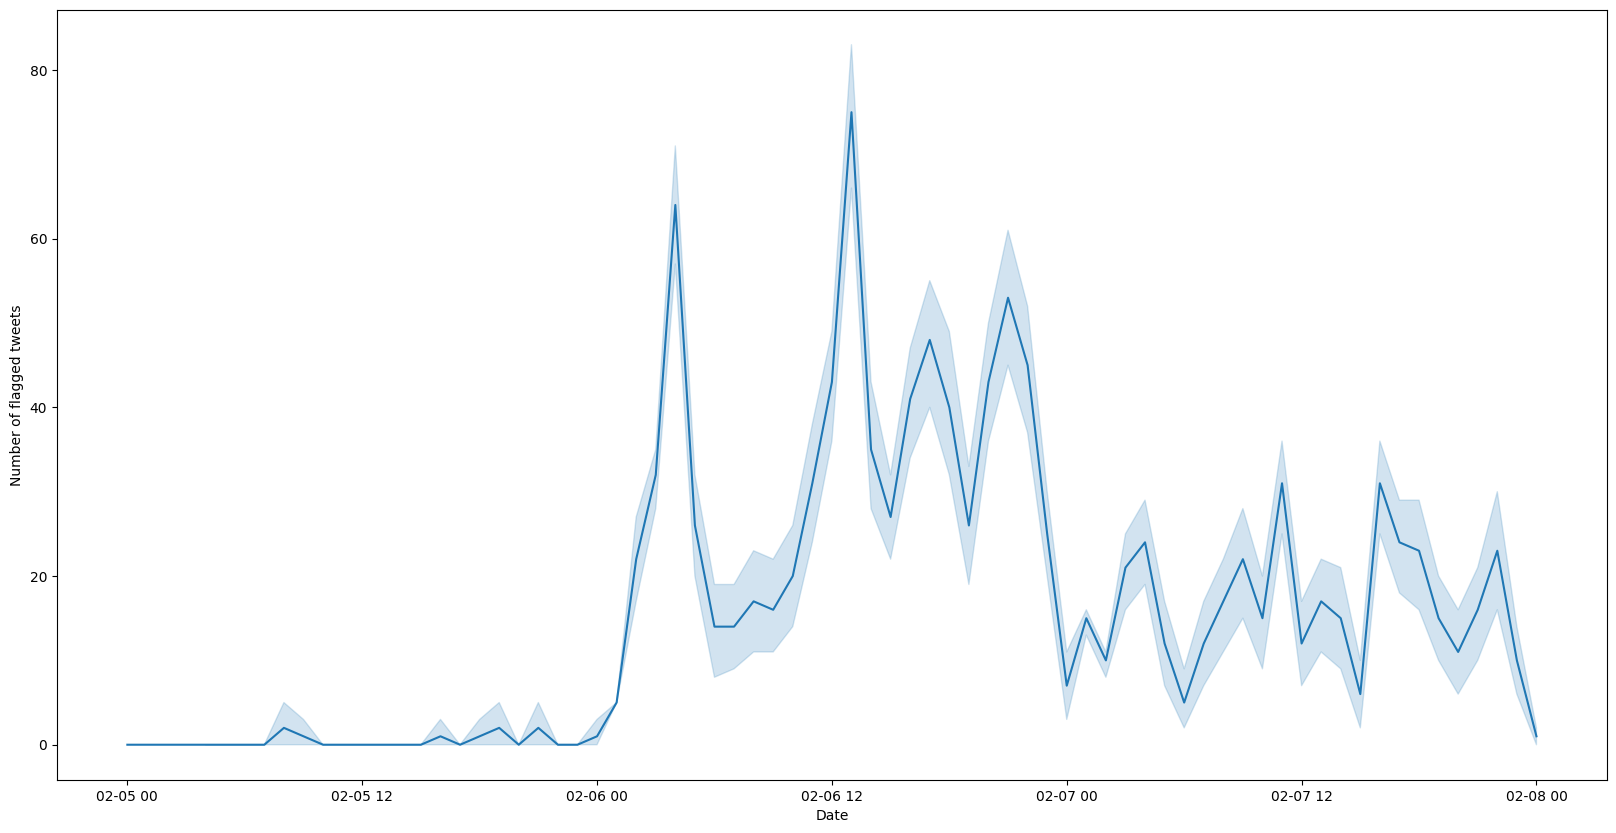

In [8]:
# Plot the predictions over time by hour
df['date'] = pd.to_datetime(df['date'])
df['date_hour'] = df['date'].dt.round('H')

# Plot a smooth line of the sum of positive predictions with seaborn
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum)

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')
plt.show()


In [9]:
# Priority tweets with predict proba
df['prediction_proba'] = model.predict_proba(X)[:,1]
# Priority are those above 0.911

df['priority'] = df['prediction_proba'].apply(lambda x: 1 if x > 0.80 else 0)

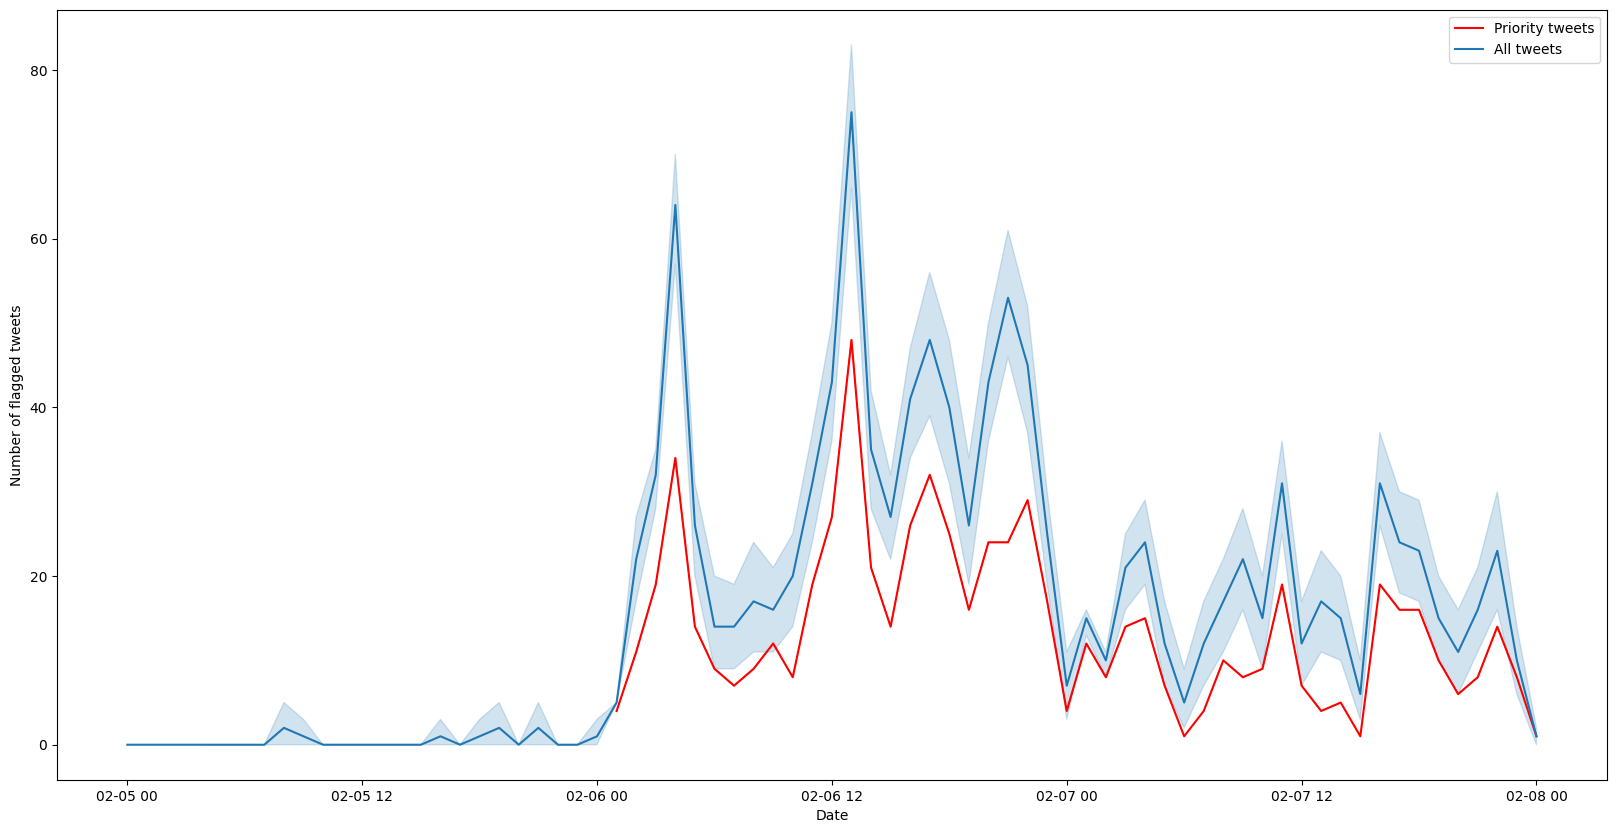

In [10]:
# Plot the same seaborn but with priority tweets 
plt.figure(figsize=(20,10))
sns.lineplot(x='date_hour', y='priority', data=df[df['priority'] == 1], estimator=sum, color='red', label='Priority tweets')
sns.lineplot(x='date_hour', y='prediction', data=df, estimator=sum, label='All tweets')
plt.legend()

# Axis labels
plt.xlabel('Date')
plt.ylabel('Number of flagged tweets')

plt.show()

In [11]:
# Use Plotly Go
import plotly.graph_objects as go

df2 = df.groupby('date_hour').agg({'prediction': 'sum', 'priority': 'sum'}).reset_index()
df2['priority'] = df2['priority'].apply(lambda x: np.nan if x == 0 else x)

# Create a figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['prediction'], mode='lines+markers', name='All positive tweets'))
fig.add_trace(go.Scatter(x=df2['date_hour'], y=df2['priority'], mode='lines+markers', name='Priority tweets'))
fig.update_layout(title='Number of flagged tweets over time',
                     xaxis_title='Date',
                        yaxis_title='Number of flagged tweets')
fig.update_traces(hovertemplate='Date: %{x}<br>Number of flagged tweets: %{y}')
fig.show()



In [12]:
# Show the earliest 5 priority tweets without the meta_features 
df[df['priority'] == 1].drop(list(features.drop('text')) + ['prediction', 'date_hour', 'priority'], axis=1).sort_values('date').head()

,date,text,prediction_proba
1860,2023-02-06 01:18:56+00:00,❗ deprem uyarisi / earthquake warning for turkey (#deprem reported near #kösreli?) — note: alerts/reports will end soon because twitter will remove its free api; see my profile. (twitter),0.886409
1859,2023-02-06 01:19:42+00:00,⚠preliminary info: #earthquake (#deprem) about 30 km n of #mercin (#turkey) 2 min ago (local time 04:17:48)❗magnitude not available yet❗updates at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu 🖥emsc-csem.org https://t.co/dp1gz3dmnt,0.803254
1858,2023-02-06 01:21:33+00:00,⚠preliminary info: m7.2 #earthquake (#deprem) about 30 km n of #mercin (#turkey) 4 min ago (local time 04:17:48). updates at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu 🖥emsc-csem.org https://t.co/4nrruubacj,0.810901
1856,2023-02-06 01:22:58+00:00,#earthquake 26 km nw of #gaziantep (#turkey) 5 min ago (local time 04:17:35). colored dots represent local shaking &amp; damage level reported by eyeswitnesses. share your experience via: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1218444 https://t.co/vwwekb88si,0.807213
1855,2023-02-06 01:30:05+00:00,breaking: powerful 7.8-magnitude earthquake hits near gaziantep in southern turkey - usgs,0.865558


In [13]:
# Show tweets that are low in confidence but still positive on 5 feb near midnight
df[(df['prediction'] == 1) & (df['prediction_proba'] < 0.70) & (df['date'] > '2023-02-05 18:00:00') & (df['date'] < '2023-02-06 01:17:00')].drop(list(features.drop('text')) + ['date_hour', 'priority'], axis=1).sort_values('date')

,date,text,prediction,prediction_proba
1928,2023-02-05 18:34:35+00:00,"two days in #gaziantep: industrial, gastronomical and cultural must-have in turkey. special thanks to honorary consul @mehparekileci 🇮🇹🇹🇷 https://t.co/e6tr1nzjgi",1,0.545322
1894,2023-02-05 20:41:36+00:00,"continue to be illegally deployed to the territory of azerbaijan in violation of paragraph 4 of the said trilateral statement, and the transfer of weapons and ammunition. transfer of land-mines through the lachin road with their subsequent planting on the sovereign territory of",1,0.583422
1893,2023-02-05 20:41:37+00:00,"territory of azerbaijan is of particular concern. since august 2022 , more than 2700 anti-personnel land-mine produced in armenia in 2021 have already been detected in parts of lachin and kalbajar districts of azerbaijan. evidently, all those mines have been deployed to the",1,0.514892
1862,2023-02-05 23:58:29+00:00,• they told me that the end is near • https://t.co/xhpn4yrkww,1,0.505585


In [14]:
# Show tweets that are low in confidence but still negative on 5 feb near midnight
df[(df['prediction'] == 0) & (df['prediction_proba'] > 0.40) & (df['date'] > '2023-02-05 13:00:00') & (df['date'] < '2023-02-06 01:17:00')].drop(list(features.drop('text')) + ['date_hour', 'priority'], axis=1).sort_values('date')


,date,text,prediction,prediction_proba
1953,2023-02-05 17:03:38+00:00,"osmanpaşa mosque was built by osman paşa in 1591. it was demolished and rebuilt approximately 5 times so far. however, the minaret was not touched in these repairs. https://t.co/nhnuyat5fc",0,0.443673
1895,2023-02-05 20:41:35+00:00,"wide-range abuse of the lachin road by the armenian side. thus, over more than two years since the signing of the trilateral statement on 10 november 2020, armenia has actively used it for illegal military purposes, including for the rotation of personnel of the armed forces that",0,0.496156
1896,2023-02-05 20:41:35+00:00,"#azerbaijan:the #lachin road is envisaged, under the trilateral statement of 10 november 2020 signed by the republic of azerbaijan , armenia and the russian federation, exclusively for humanitarian purposes. in this context, the azerbaijani side further draws the attention to",0,0.479471


### Topic Modelling

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import gensim
from gensim.utils import simple_preprocess

In [17]:
#copy copy those tweets that are flagged as positive
df_lda = df[df['prediction'] == 1].copy()
df_lda.head()

,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio,prediction,date_hour,prediction_proba,priority
1,2023-02-07 23:36:57+00:00,‼ no further info about this #earthquake will be displayed here. find more at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219922 🖥emsc-csem.org/earthquake/ear…,7,8.647059,163,16,1.000000,1,2023-02-08 00:00:00+00:00,0.838119,1
5,2023-02-07 23:26:33+00:00,🕒 this is the 196th felt #earthquake in central turkey in the last 47 hours.,6,4.133333,76,2,0.866667,1,2023-02-07 23:00:00+00:00,0.822599,1
6,2023-02-07 23:19:30+00:00,#earthquake 13 km ne of #göksun (#turkey) 11 min ago (local time 02:08:01). colored dots represent local shaking &amp; damage level reported by eyewitnesses. share your experience: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219922 https://t.co/wm64q62gtu,3,7.633333,258,28,1.000000,1,2023-02-07 23:00:00+00:00,0.830390,1
7,2023-02-07 23:19:14+00:00,🔔#earthquake (#deprem) m3.7 occurred 13 km ne of #göksun (#turkey) 11 min ago (local time 02:08:01). more info at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219922 🖥emsc-csem.org/earthquake/ear… https://t.co/jhjkhegess,2,8.739130,223,33,1.000000,1,2023-02-07 23:00:00+00:00,0.758008,0
8,2023-02-07 23:11:07+00:00,‼ no further info about this #earthquake will be displayed here. find more at: 📱emsc-csem.org/service/applic… 🌐m.emsc.eu/?id=1219911 🖥emsc-csem.org/earthquake/ear…,7,8.647059,163,16,1.000000,1,2023-02-07 23:00:00+00:00,0.838119,1


#### Preprocessing

In [18]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [19]:
df_lda['text'] = df_lda['text'].apply(lambda x:clean_text(x))
df_lda= df_lda.reset_index(drop=True)

In [29]:
df_lda['tokenized'] = df['text'].apply(lambda x: list(gensim.utils.tokenize(x)))

In [30]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [31]:
df_lda['nostopwords_text'] = df_lda['tokenized'].apply(lambda x:remove_stopword(x))

In [32]:
df_lda.head()

,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio,prediction,date_hour,prediction_proba,priority,tokenized,nostopwords_text
0,2023-02-07 23:36:57+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,7,8.647059,163,16,1.000000,1,2023-02-08 00:00:00+00:00,0.838119,1,"[no, tientes, https, t, co, ud, ysyis, j]","[tientes, https, co, ud, ysyis, j]"
1,2023-02-07 23:26:33+00:00,🕒 this is the felt earthquake in central turkey in the last hours,6,4.133333,76,2,0.866667,1,2023-02-07 23:00:00+00:00,0.822599,1,"[no, further, info, about, this, earthquake, will, be, displayed, here, find, more, at, emsc, csem, org, service, applic, m, emsc, eu, id, emsc, csem, org, earthquake, ear]","[info, earthquake, displayed, find, emsc, csem, org, service, applic, emsc, eu, id, emsc, csem, org, earthquake, ear]"
2,2023-02-07 23:19:30+00:00,earthquake km ne of göksun turkey min ago local time colored dots represent local shaking amp damage level reported by eyewitnesses share your experience 📱emsccsemorgserviceapplic… 🌐,3,7.633333,258,28,1.000000,1,2023-02-07 23:00:00+00:00,0.830390,1,"[luz_marcha, good, night]","[luz_marcha, good, night]"
3,2023-02-07 23:19:14+00:00,🔔earthquake deprem occurred km ne of göksun turkey min ago local time more info at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,2,8.739130,223,33,1.000000,1,2023-02-07 23:00:00+00:00,0.758008,0,"[chrishowley, clever, girl]","[chrishowley, clever, girl]"
4,2023-02-07 23:11:07+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,7,8.647059,163,16,1.000000,1,2023-02-07 23:00:00+00:00,0.838119,1,"[flirtyflightb, beautiful]","[flirtyflightb, beautiful]"


In [34]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=0.01)
count_data = count_vectorizer.fit_transform(df_lda['nostopwords_text'].apply(lambda x: ' '.join(x)))
vocab = count_vectorizer.get_feature_names_out()

n, m = count_data.shape
print('Number of documents: ', n)
k = 6

#build the LDA model using sklearn
lda_model = LatentDirichletAllocation(n_components=k, max_iter=10, learning_method='online', random_state=0)
lda_model.fit(count_data)

#find the top 10 words in each topic
def print_topics(model, n_top_words):
    topic_word = model.components_

    for j in range(m):
        topic_word[:,j] /= sum(topic_word[:,j])
    for i in range(k):
        proj_j = []
        for j in range(m):
            proj_j.append((topic_word[i,j],j))
        
        prob_sorted = sorted(proj_j, reverse=True)
        print('topic',i+1)
        for j in range(n_top_words):
            print('    ', prob_sorted[j][0], vocab[prob_sorted[j][1]])

print_topics(lda_model, 10)

Number of documents:  1167
topic 1
     0.992762832382098 need
     0.9701593906791458 reinforcements
     0.9660405543527982 food
     0.9646468040645675 quickly
     0.9623668601020663 instagram
     0.9591104159776809 volunteers
     0.9587744775273399 details
     0.9562257697573104 days
     0.9554571321430867 firstaid
     0.9551255097029526 photo
topic 2
     0.9959895749554871 ago
     0.9959785079401304 min
     0.99581233224144 local
     0.9861914302028236 experience
     0.9815589493520065 eyewitnesses
     0.9718791015567735 share
     0.9645013404965282 updated
     0.9605385302617241 damage
     0.9481109898262687 eyeswitnesses
     0.9408206670706117 preliminary
topic 3
     0.9863542001292689 thank
     0.9775751734346585 dear
     0.9445385445336668 support
     0.9437641031978186 rt
     0.932229616231999 emergency
     0.8232442316017455 turkish
     0.7990341112807516 help
     0.7548027644511558 god
     0.2773363048948005 prayers
     0.19872178616949907 rubble
t

In [35]:
# create dataframe with the topic distribution for each document
topic_dist = lda_model.transform(count_data)
topic_dist = pd.DataFrame(topic_dist)
topic_dist.columns = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6']
topic_dist.head()

,topic1,topic2,topic3,topic4,topic5,topic6
0,0.083507,0.083750,0.083333,0.582450,0.083626,0.083333
1,0.011114,0.011185,0.011111,0.011111,0.011114,0.944365
2,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [36]:
# append the topic distribution to the original dataframe
df_lda = pd.concat([df_lda, topic_dist], axis=1)
df_lda.head()

,date,text,stop_word_count,mean_word_length,char_count,punctuation_count,word_unique_ratio,prediction,date_hour,prediction_proba,priority,tokenized,nostopwords_text,topic1,topic2,topic3,topic4,topic5,topic6
0,2023-02-07 23:36:57+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,7,8.647059,163,16,1.000000,1,2023-02-08 00:00:00+00:00,0.838119,1,"[no, tientes, https, t, co, ud, ysyis, j]","[tientes, https, co, ud, ysyis, j]",0.083507,0.083750,0.083333,0.582450,0.083626,0.083333
1,2023-02-07 23:26:33+00:00,🕒 this is the felt earthquake in central turkey in the last hours,6,4.133333,76,2,0.866667,1,2023-02-07 23:00:00+00:00,0.822599,1,"[no, further, info, about, this, earthquake, will, be, displayed, here, find, more, at, emsc, csem, org, service, applic, m, emsc, eu, id, emsc, csem, org, earthquake, ear]","[info, earthquake, displayed, find, emsc, csem, org, service, applic, emsc, eu, id, emsc, csem, org, earthquake, ear]",0.011114,0.011185,0.011111,0.011111,0.011114,0.944365
2,2023-02-07 23:19:30+00:00,earthquake km ne of göksun turkey min ago local time colored dots represent local shaking amp damage level reported by eyewitnesses share your experience 📱emsccsemorgserviceapplic… 🌐,3,7.633333,258,28,1.000000,1,2023-02-07 23:00:00+00:00,0.830390,1,"[luz_marcha, good, night]","[luz_marcha, good, night]",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
3,2023-02-07 23:19:14+00:00,🔔earthquake deprem occurred km ne of göksun turkey min ago local time more info at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,2,8.739130,223,33,1.000000,1,2023-02-07 23:00:00+00:00,0.758008,0,"[chrishowley, clever, girl]","[chrishowley, clever, girl]",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
4,2023-02-07 23:11:07+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,7,8.647059,163,16,1.000000,1,2023-02-07 23:00:00+00:00,0.838119,1,"[flirtyflightb, beautiful]","[flirtyflightb, beautiful]",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [37]:
#based on the topic distribution, create a new column with the top topic for each document
df_lda['top_topic'] = df_lda[['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6']].idxmax(axis=1)
#only keep the date, text and top topic columns
df_lda = df_lda[['date', 'text', 'top_topic']]
df_lda.head()

,date,text,top_topic
0,2023-02-07 23:36:57+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,topic4
1,2023-02-07 23:26:33+00:00,🕒 this is the felt earthquake in central turkey in the last hours,topic6
2,2023-02-07 23:19:30+00:00,earthquake km ne of göksun turkey min ago local time colored dots represent local shaking amp damage level reported by eyewitnesses share your experience 📱emsccsemorgserviceapplic… 🌐,topic1
3,2023-02-07 23:19:14+00:00,🔔earthquake deprem occurred km ne of göksun turkey min ago local time more info at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,topic1
4,2023-02-07 23:11:07+00:00,‼ no further info about this earthquake will be displayed here find more at 📱emsccsemorgserviceapplic… 🌐 🖥emsccsemorgearthquakeear…,topic1


In [ ]:
from wordcloud import WordCloud, STOPWORDS

topic 1
     0.9956863543194759 ago
     0.9956628860546063 min
     0.9947107282923767 occurred
     0.9835819880507745 share
     0.9826482430857153 experience
     0.9807587320259384 led
     0.9807509021906623 casualties
     0.9799886249563591 damage
     0.9729370783805804 eyewitnesses
     0.954319787124795 eyeswitnesses
     0.9483092402871203 updated
     0.9448242899496273 deadliest
     0.9448106459046053 recent
     0.9393356791574757 local
     0.9121228316580109 map
     0.9105519609428868 elbistan
     0.8863075481838004 reported
     0.8604628954864642 sw
     0.859168814122754 ne
     0.8536275946235168 nw


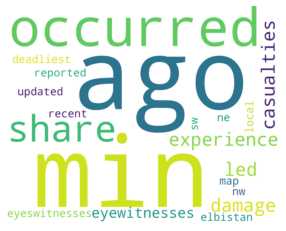

topic 2
     0.9575848092900999 details
     0.9566385640237237 days
     0.9461584727622014 thanks
     0.9444946834287598 𝘰𝘯
     0.9444406460368451 probability
     0.944428839143584 radius
     0.9443856860349339 𝘐𝘴𝘴𝘶𝘦𝘥
     0.9443741512640691 richterx
     0.9443559441667164 oef
     0.8822963485031329 eastern
     0.7791864647147559 gaziantep
     0.5142887157782943 türkiye
     0.5075993944596652 com
     0.4599193826606841 preliminary
     0.4592483879644602 updates
     0.39162748290295074 data
     0.2401290598192215 malatya
     0.19795020232800137 kahramanmaraş
     0.12181543581465785 deprem
     0.09431140346759462 se


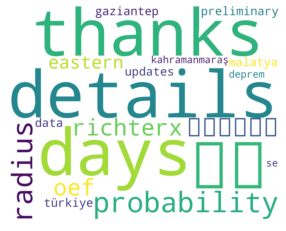

topic 3
     0.9928149724279126 amin
     0.9807301895359938 thank
     0.9721840394554985 depth
     0.9607728810272713 tell
     0.957946468304168 eqvt
     0.9579428447788575 seismós
     0.9579302420911456 registered
     0.9579297656879829 רעידת_אדמה
     0.9579247892384534 province
     0.9579227951435169 feel
     0.9579123693206534 σεισμός
     0.9544540510841354 moderate
     0.9520012440005612 terremoto
     0.9465737947610652 mb
     0.9449511742695454 babalatv
     0.9403148882584839 afadbaskanlik
     0.9373660065978439 ahbap
     0.9280360199052267 kizilay
     0.7866351378298955 زلزال
     0.775247828102671 magnitude


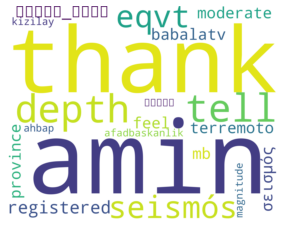

topic 4
     0.9937693528233484 need
     0.9900022855695803 hatay
     0.9891747761177989 help
     0.9751933582580385 turkeyearthquake
     0.9735437645158798 prayforturkey
     0.9734582044050214 reinforcements
     0.969895261119111 food
     0.9680938440243004 earthquakeinturkey
     0.9676738810516965 quickly
     0.9671878007592616 breaking
     0.9628150034086572 volunteers
     0.960740918879537 pray
     0.9592477308175444 firstaid
     0.9509259330938771 support
     0.9504506266936914 allah
     0.9469513607522204 rt
     0.9462218055891828 turkeyquake
     0.9451745984551337 helpturkey
     0.9390698208317825 aid
     0.9339444494414493 affected


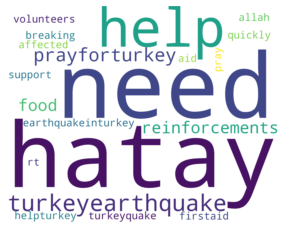

topic 5
     0.9943369351849136 displayed
     0.9480597724369434 using
     0.9448076514897307 instrumental
     0.9448039855058885 onwards
     0.9448009255212556 catalog
     0.9448002607328368 iscseism
     0.9447885956169786 seismicity
     0.9447866385062866 regional
     0.7930599702607584 struck
     0.579526483862962 data
     0.516759402599007 region
     0.5118303216900261 ear
     0.46610577374346346 org
     0.46385196937049694 csem
     0.4606138940933005 emsc
     0.4580517452266742 info
     0.43135628726925795 applic
     0.4300749769300549 service
     0.42864706308143796 eu
     0.42174100772089707 id


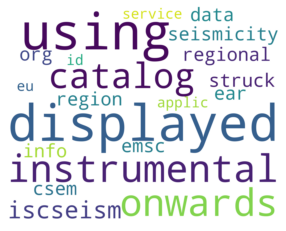

topic 6
     0.9927873982289045 usgs
     0.9908673701759944 utc
     0.9839472759476556 ev
     0.9839460113237556 reports
     0.9662846018698698 app
     0.9644667085288436 instagram
     0.9611058305094682 th
     0.9601770882961727 today
     0.9596237992570008 photo
     0.9578299430953753 hours
     0.9576750120701412 hit
     0.9505198876942677 try
     0.9485723259226845 approximately
     0.9478111856961965 republic
     0.9456506071182815 evet
     0.9449722532065286 wrap
     0.9449722493496472 syrian
     0.9449630540156787 arab
     0.944931336201671 ℹevent
     0.9431803030170319 posted


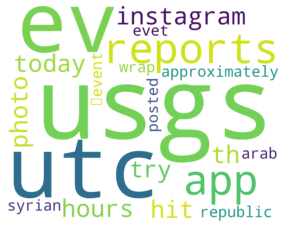

In [ ]:
#find top 20 words in each topic
def print_topics(model, n_top_words):
    topic_word = model.components_

    for j in range(m):
        topic_word[:,j] /= sum(topic_word[:,j])
    for i in range(k):
        proj_j = []
        for j in range(m):
            proj_j.append((topic_word[i,j],j))
        
        prob_sorted = sorted(proj_j, reverse=True)
        print('topic',i+1)
        for j in range(n_top_words):
            print('    ', prob_sorted[j][0], vocab[prob_sorted[j][1]])

        #create wordcloud for each topic
        wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2500, height=2000).generate(' '.join([vocab[prob_sorted[j][1]] for j in range(n_top_words)]))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()


print_topics(lda_model, 20)
